# Setting up Workspace

## Importing Libraries

In [1]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import (
    Dense, Dropout, LayerNormalization, MultiHeadAttention,Layer, GlobalAveragePooling1D, Input,Reshape, Lambda,Attention
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Importing Dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/indian-personal-finance-and-spending-habits")

print("Path to dataset files:", path)

100%|██████████| 3.95M/3.95M [00:01<00:00, 3.80MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shriyashjagtap/indian-personal-finance-and-spending-habits/versions/1


In [3]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file using pandas
df = pd.read_csv(csv_file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

# Preliminary Data Analysis

In [5]:
df.iloc[:,:15]

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,1641.047762,1938.821782,2841.315106
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,3770.919375,2356.408295,5471.740939,2726.601476,5284.429024
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,2792.618808,2025.398570,3910.466560
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,2545.419412,4721.792454,9104.612331,5304.363988,6237.319313


In [6]:
df.iloc[:,16:26]

,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education
0,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000
1,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874
2,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597
3,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000
4,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120
...,...,...,...,...,...,...,...,...,...,...
19995,12.353542,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527
19996,11.754249,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622
19997,13.854837,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663
19998,17.436659,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012


In [7]:
corr = df.select_dtypes(include=[np.number]).corr()

### Visualizing Outliers

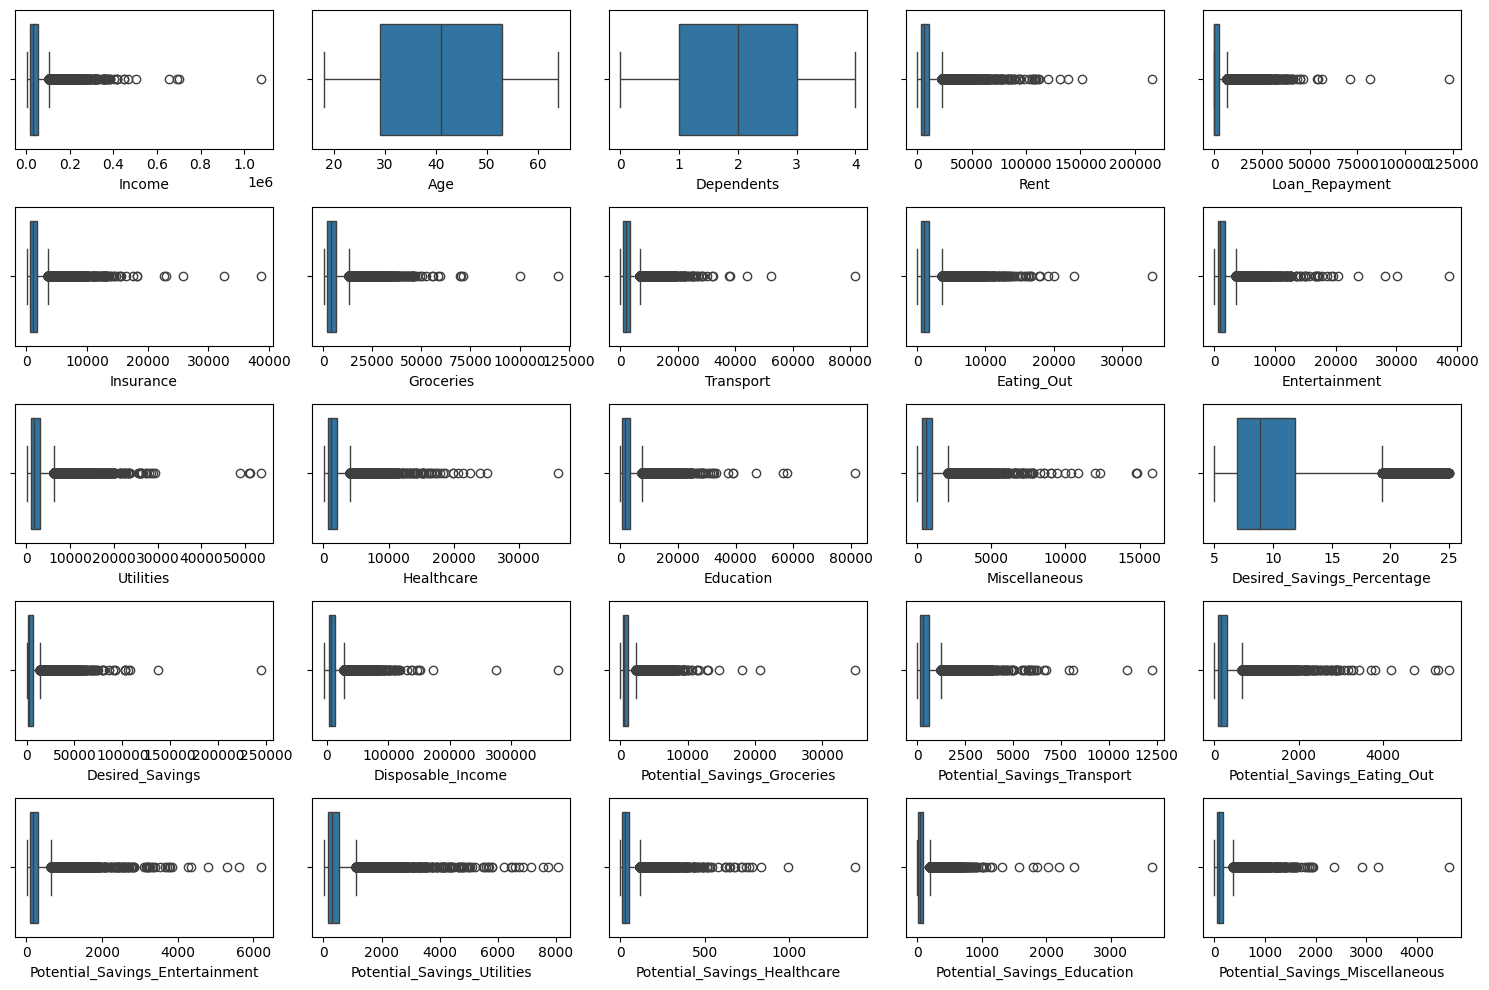

In [8]:
cols = df.select_dtypes(include=[np.number]).columns.to_list()

figure = plt.figure(figsize=(15, 10))

for i, j in enumerate(cols):
    ax = plt.subplot(5,5,i+1)
    sns.boxplot(x = j, data = df)
plt.tight_layout()
plt.show()

* **Distribution:** Many of the variables exhibit a right-skewed distribution, meaning there are a few high values that pull the mean to the right.

* **Outliers:**Several variables have outliers, especially on the right side. These outliers might indicate unusual or extreme values that could influence the analysis.

* **Variability:** The variability (spread) of the data differs across variables. Some variables have a wider range of values than others.

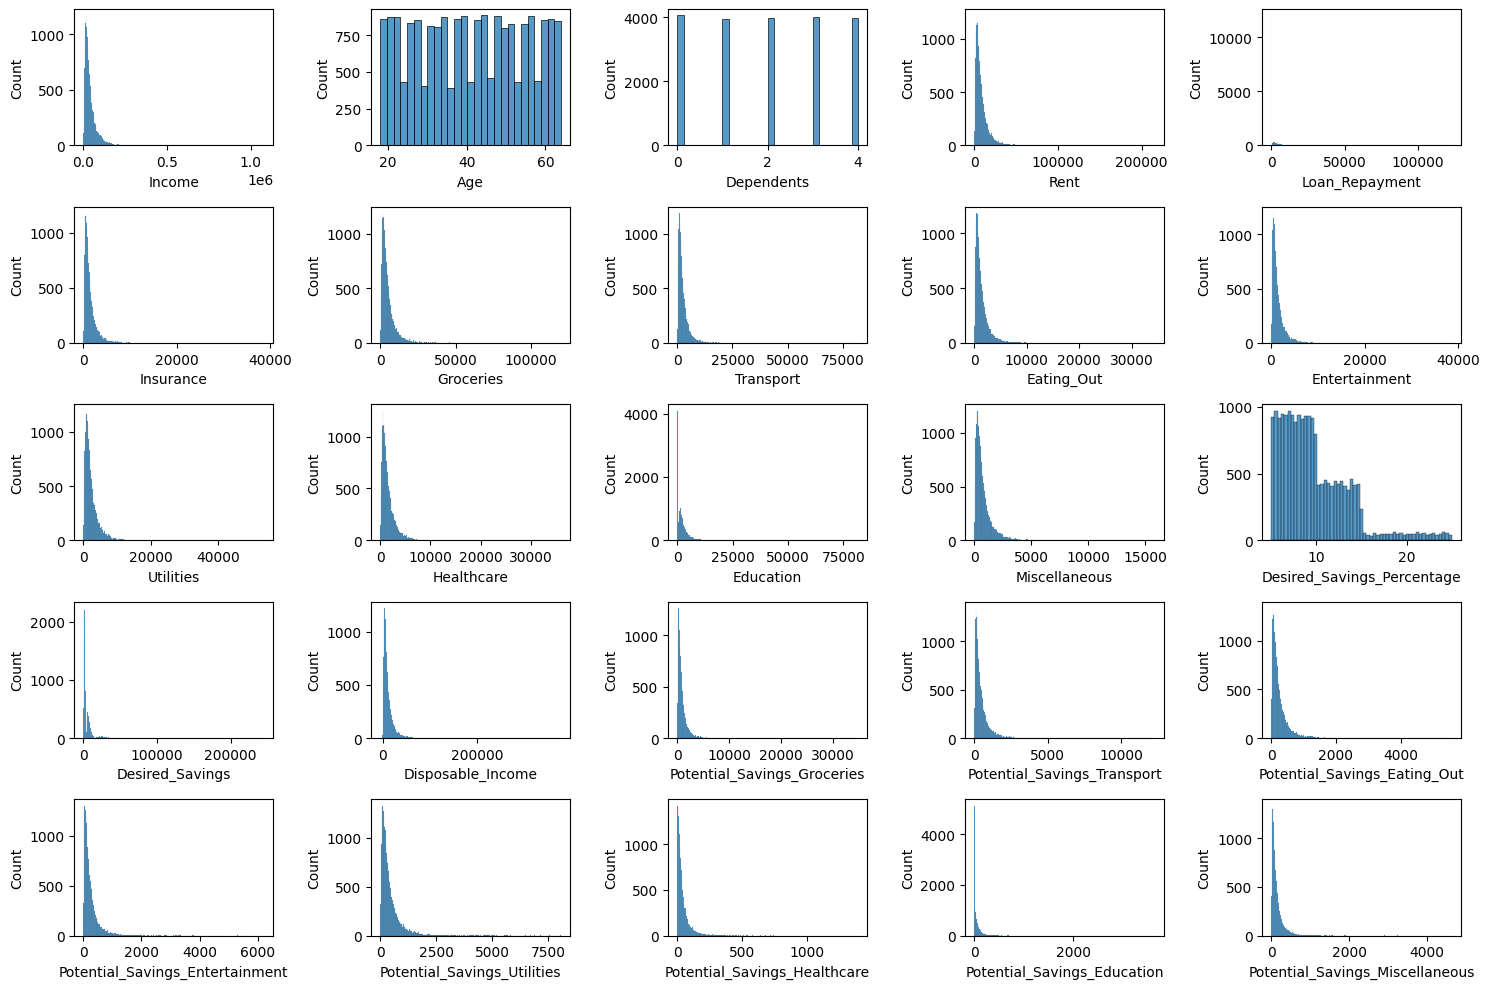

In [9]:
figure = plt.figure(figsize=(15, 10))

for i, j in enumerate(cols):
    ax = plt.subplot(5,5,i+1)
    sns.histplot(x = j, data = df)
plt.tight_layout()
plt.show()

<ipython-input-10-4fa4ac47bb5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')


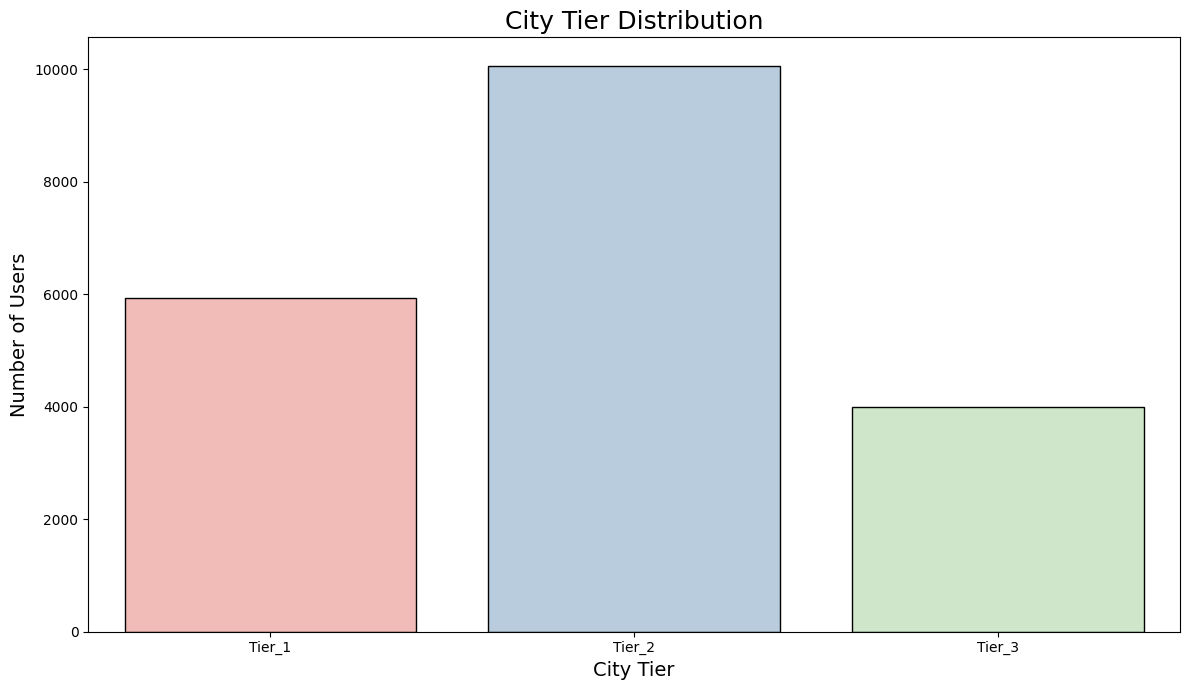

In [10]:
plt.figure(figsize=(12, 7))
sns.countplot(x='City_Tier', data=df, palette='Pastel1', edgecolor='black')
plt.title('City Tier Distribution', fontsize=18)
plt.xlabel('City Tier', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.tight_layout()
plt.show()

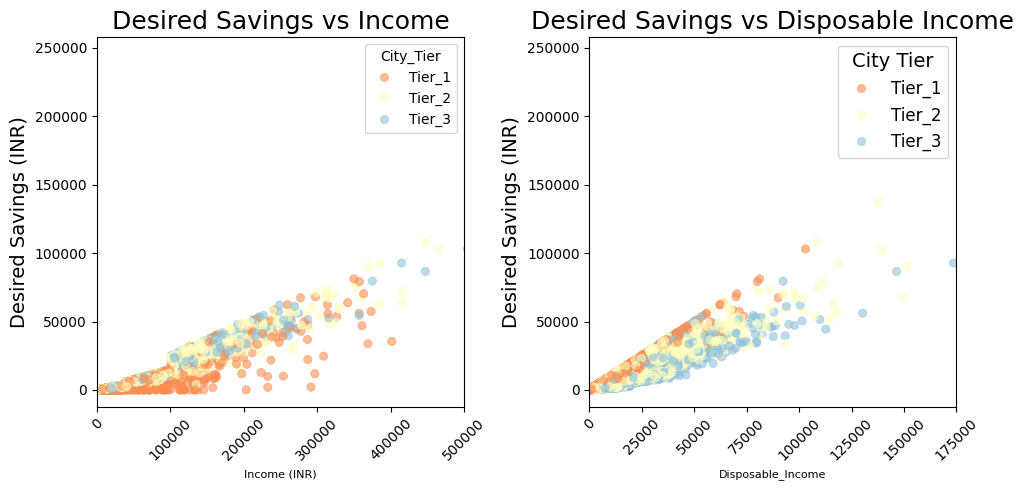

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(
    data=df,
    x='Income',
    y='Desired_Savings',
    hue='City_Tier',
    palette='RdYlBu',
    alpha=0.6,
    edgecolor=None,
    ax=plt.gca()
)
plt.title('Desired Savings vs Income', fontsize=18)
plt.xlabel('Income (INR)', fontsize=8)
plt.xticks(rotation=45)
plt.xlim(0, 500000)
plt.ylabel('Desired Savings (INR)', fontsize=14)
plt.subplot(1,2,2)
sns.scatterplot(
    data=df,
    x='Disposable_Income',
    y='Desired_Savings',
    hue='City_Tier',
    palette='RdYlBu',
    alpha=0.6,
    edgecolor=None,
    ax=plt.gca()
)
plt.title('Desired Savings vs Disposable Income', fontsize=18)
plt.xlabel('Disposable_Income', fontsize=8)
plt.xticks(rotation=45)
plt.xlim(0, 175000)
plt.ylabel('Desired Savings (INR)', fontsize=14)



plt.legend(title='City Tier', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

### Checking for Collinearity

<Axes: >

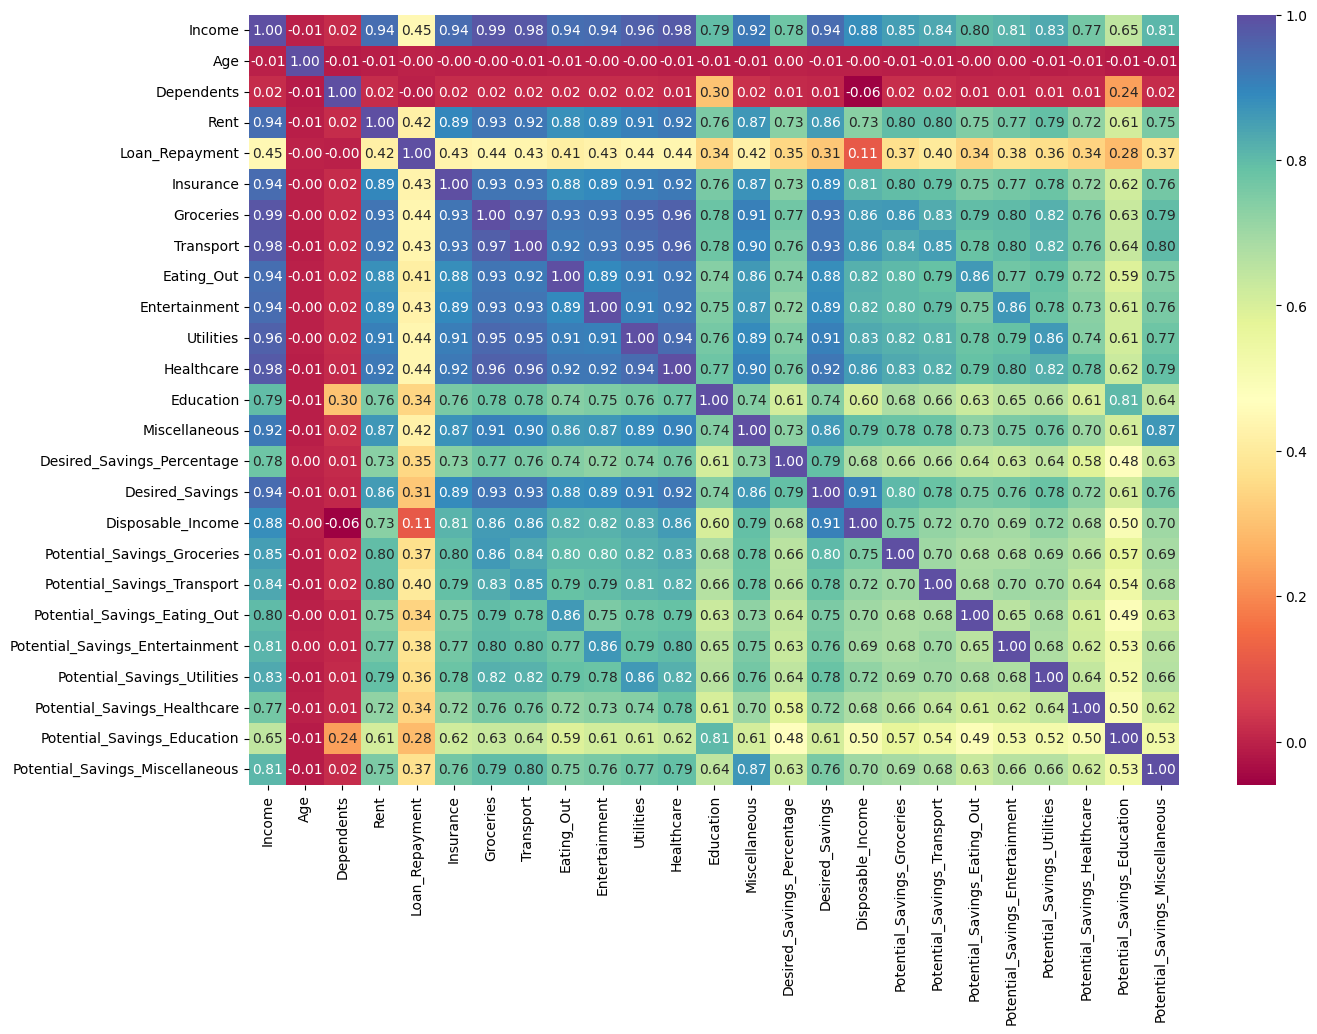

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Spectral', cbar=True)

# Feature Engineering

In [13]:
variables = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
    ]

targets = [f'Potential_Savings_{cat}' for cat in variables]

numerical_features = [
    'Income', 'Age', 'Dependents','Insurance', 'Rent', 'Disposable_Income', 'Desired_Savings'
] + variables

expenditures = variables + ['Rent', 'Insurance']

categories = ['Occupation', 'City_Tier']

In [14]:
df['Expenses'] = 0
for exp in expenditures:
  df['Expenses'] += df[exp]

<Axes: >

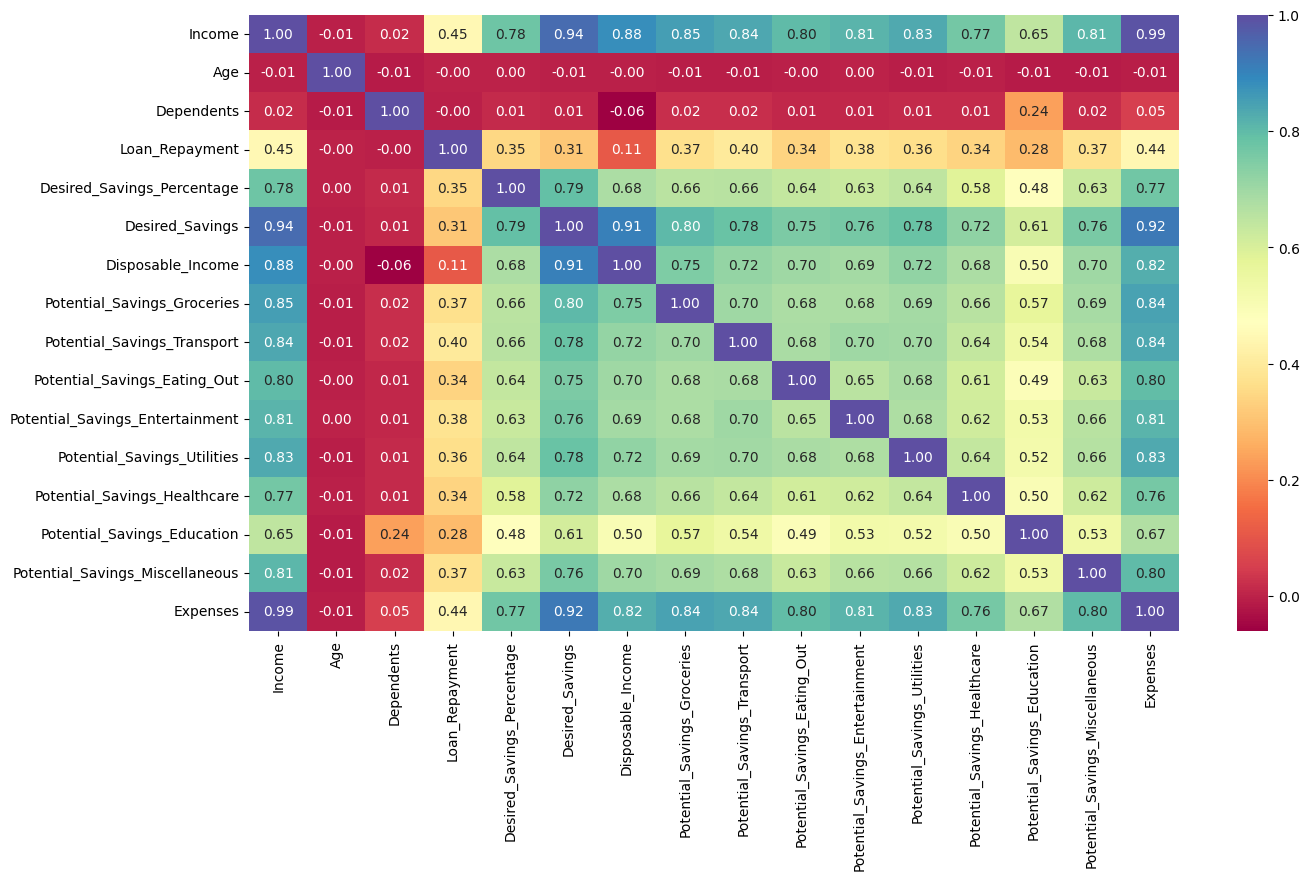

In [15]:
corr = df.drop(columns=expenditures).select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Spectral', cbar=True)

## Feature Selection

In [16]:
df2 = df.copy()

In [17]:
numerical_features = [
    'Income', 'Age', 'Dependents', 'Expenses', 'Disposable_Income', 'Desired_Savings'
]

In [18]:
df2.drop(columns=expenditures, inplace=True)

In [19]:
df2.select_dtypes(include=['object']).columns

Index(['Occupation', 'City_Tier'], dtype='object')

In [20]:
encoder = LabelEncoder()
for cat in categories:
  df2[cat] = encoder.fit_transform(df2[cat])

In [21]:
df_features = pd.concat([df2[numerical_features], df2[categories]], axis=1)

In [22]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_features)

In [23]:
X = scaled
y = df2[targets]

# Splitting Dataset for ML

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df['City_Tier'])

# Model Building

## **Attention Layer** from scratch

In [27]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight matrix for attention
        self.W = self.add_weight(
            name='att_weight', shape=(input_shape[-1], 1),
            initializer='glorot_uniform', trainable=True
        )
        # Create a bias term for attention
        self.b = self.add_weight(
            name='att_bias', shape=(input_shape[-1],),
            initializer='zeros', trainable=True
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        # Compute attention scores (e) by applying weight and bias
        e = tf.matmul(x, self.W) + self.b  # Shape: (batch_size, time_steps, 1)
        e = tf.squeeze(e, -1)  # Remove the last dimension, shape: (batch_size, time_steps)

        # Apply softmax to get the attention weights (a)
        a = tf.nn.softmax(e, axis=1)  # Normalize scores across time steps or features
        a = tf.expand_dims(a, -1)  # Expand dims to align with input, shape: (batch_size, time_steps, 1)

        # Compute the weighted sum of inputs (output)
        output = x * a  # Apply attention weights to input, shape: (batch_size, time_steps, features)
        return tf.reduce_sum(output, axis=1)  # Aggregate across the time/feature dimension

In [28]:
def rmse_loss(y_true, y_pred):
  return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

## Forming a FeedForward Network

In [29]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

dense1 = Dense(128, activation='linear')(input_layer)
dropout1 = Dropout(0.2)(dense1)

# Adding a parallel path for width
dense_parallel = Dense(32, activation='linear')(input_layer)

reshaped = Reshape((128, 1))(dense1)

attention_output = AttentionLayer()(reshaped)

dense2 = Dense(64, activation='linear')(attention_output)
dropout2 = Dropout(0.2)(dense2)
dense3 = Dense(32, activation='linear')(dropout2)

# Concatenating with final layer before output
merged_output = concatenate([dense3, dense_parallel])

output_layer = Dense(len(targets), activation='linear')(merged_output)

model = Model(inputs=input_layer, outputs=output_layer)

#Compiling Model
model.compile(optimizer='adam', loss=rmse_loss, metrics=['mae'])

In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          1,152 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 128, 1)         │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None, 1)              │              2 │ reshape[0][0]          │
│ (AttentionLayer)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │            128 │ attention_layer[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          2,080 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │            288 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64)             │              0 │ dense_3[0][0],         │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 8)              │            520 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,170 (16.29 KB)

 Trainable params: 4,170 (16.29 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
)

## Fitting Model to Data

In [32]:
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose = 1
)

Epoch 1/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 552.3664 - mae: 288.4666 - val_loss: 284.9162 - val_mae: 152.0323 - learning_rate: 0.0010
Epoch 2/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 273.8169 - mae: 145.8215 - val_loss: 272.1100 - val_mae: 139.6184 - learning_rate: 0.0010
Epoch 3/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261.5945 - mae: 137.0545 - val_loss: 267.8270 - val_mae: 136.2553 - learning_rate: 0.0010
Epoch 4/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255.9572 - mae: 133.7313 - val_loss: 264.0233 - val_mae: 134.1168 - learning_rate: 0.0010
Epoch 5/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 256.1714 - mae: 133.2918 - val_loss: 261.8380 - val_mae: 132.4888 - learning_rate: 0.0010
Epoch 6/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 253.9978 - mae: 131.6207 - val_loss: 259.1152 - val_mae: 130.9184 - learning_rate: 0.0010
Epoch 7/150
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 248.8712 - mae: 129.7513 - val_lo

In [33]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 247.8333 - mae: 125.6021
Test Loss: 251.0253
Test MAE: 126.5336


# Model Evaluation

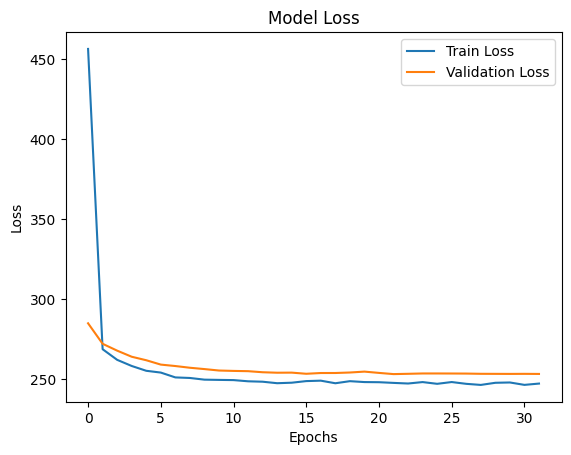

In [34]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

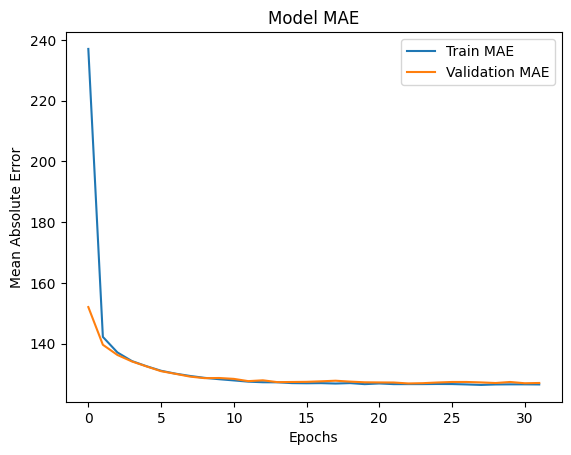

In [35]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


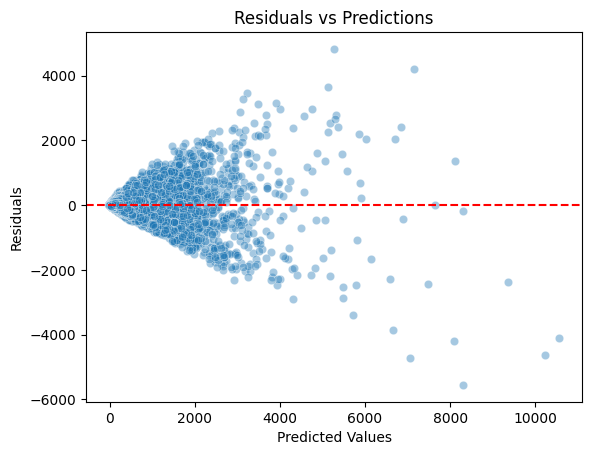

In [39]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

y_pred = y_pred.reshape(-1)
residuals = residuals.values.reshape(-1)

sns.scatterplot(x=y_pred, y=residuals, alpha = 0.4)
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [37]:
y_pred = model.predict(X_test)

# Convert predictions and actual values to DataFrames for easier handling
y_test_df = pd.DataFrame(y_test, columns=targets).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=targets)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


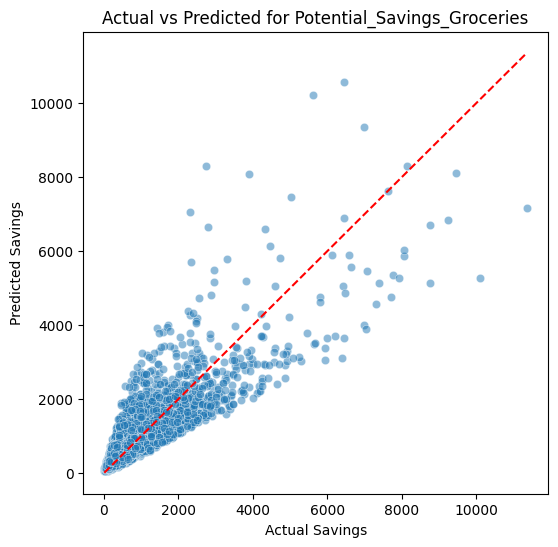

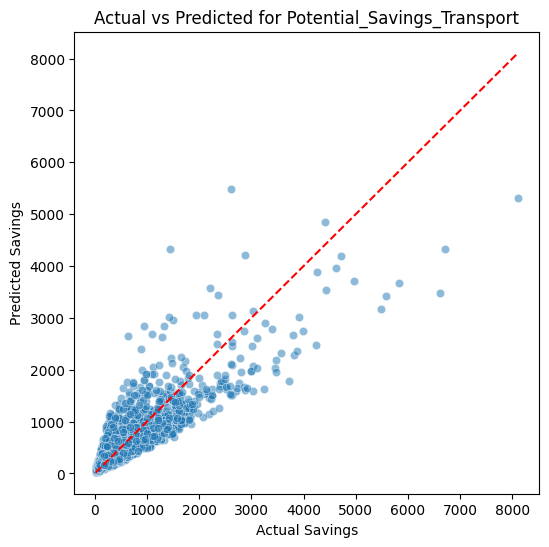

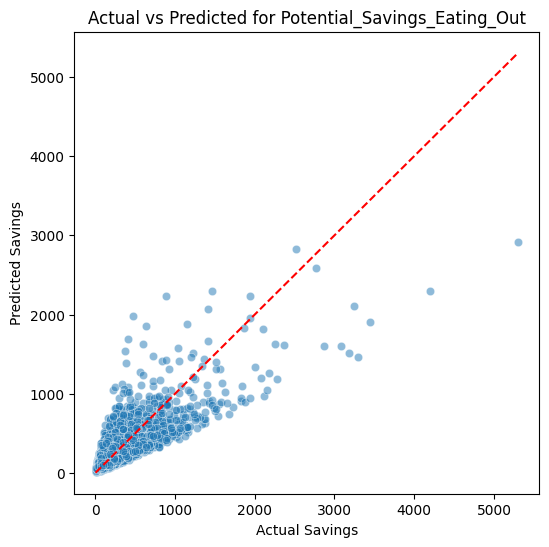

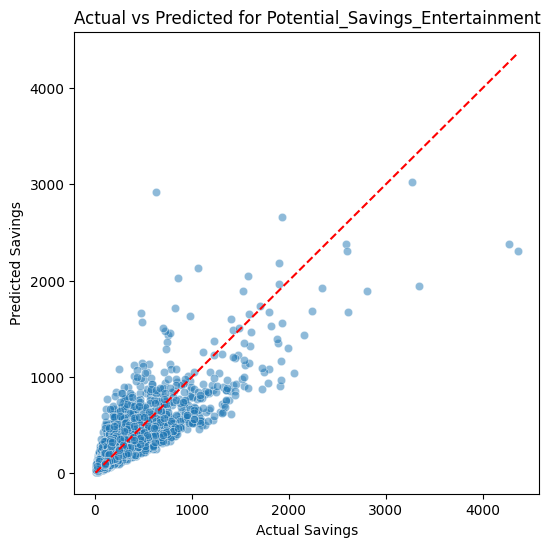

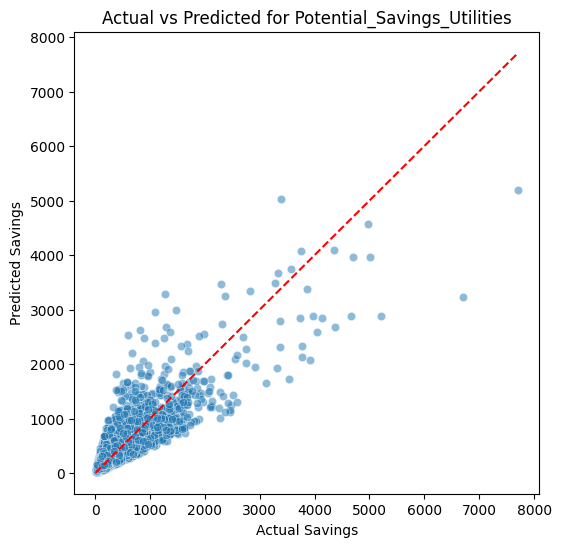

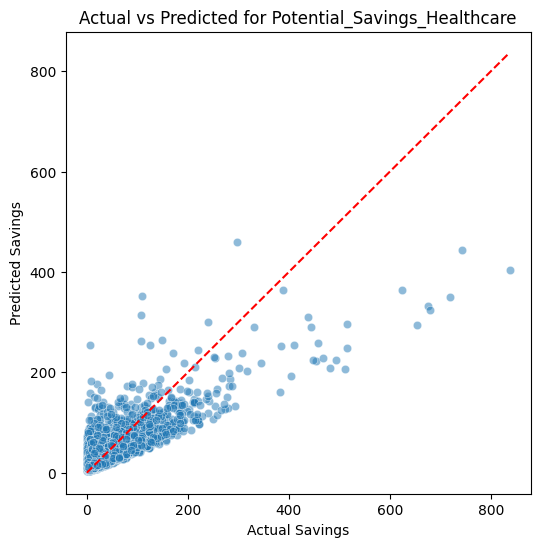

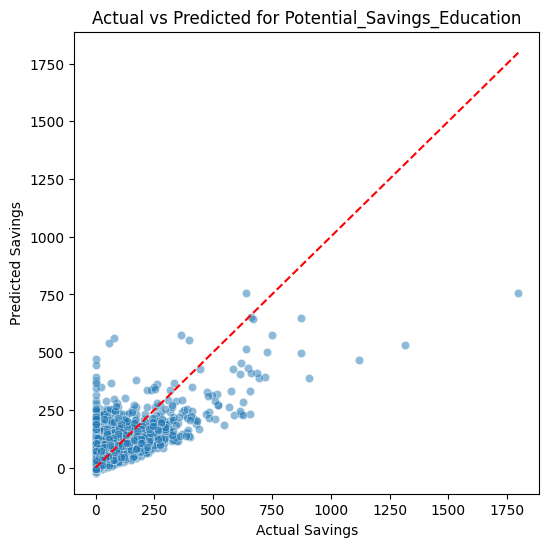

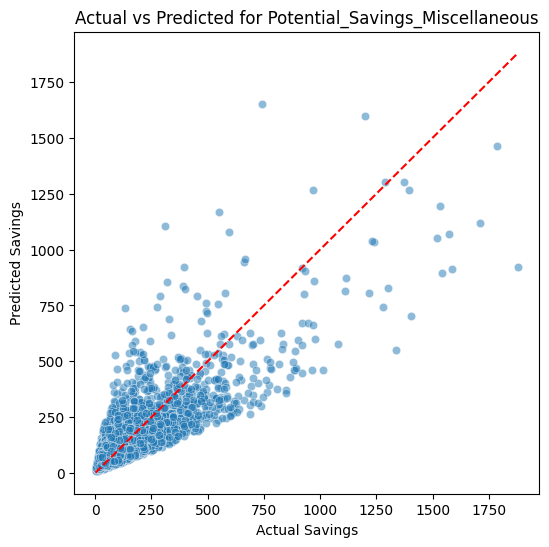

In [38]:
for col in targets:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test_df[col], y=y_pred_df[col], alpha=0.5)
    plt.plot([y_test_df[col].min(), y_test_df[col].max()],
             [y_test_df[col].min(), y_test_df[col].max()],
             'r--')
    plt.title(f'Actual vs Predicted for {col}')
    plt.xlabel('Actual Savings')
    plt.ylabel('Predicted Savings')
    plt.show()